In [2]:
using DifferentialEquations, Plots
using DifferentialEquations.EnsembleAnalysis
using StatsBase, DataFrames

In [67]:
# Drift and Mean
function μ_SDE(du,u,p,t)
  du .= p.μ
end

function σ_SDE(du,u,p,t)
  du .= p.σ
end

σ_SDE (generic function with 1 method)

In [80]:
T = 10.;
function save_func(u, t, integrator) 
    if length(integrator.p.moments) == 0 
        g = 0.
    else
        g = mean(u) - integrator.p.moments[end][2]
    end            
    moments = [minimum(u), mean(u), maximum(u), g]
    push!(integrator.p.moments, moments) 
end 

save_func (generic function with 1 method)

In [81]:
p = (μ = 0.01, σ = 0.1, N = 3, moments = Array{Array{Float64, 1}, 1}());
x_iv = rand(p.N)
prob = SDEProblem(μ_SDE, σ_SDE, x_iv ,(0.0, T), p);
saveat = 0:0.1:T

0.0:0.1:10.0

In [82]:
cb = FunctionCallingCallback(save_func;
                 funcat=saveat,
                 func_everystep=true,
                 func_start = true,
                 tdir=1);

In [83]:
function output_func(sol, i)
    return (u = sol.prob.p.moments, t = sol.t), false
end
    
function prob_func(prob,i,repeat)
    p = (μ = 0.01, σ = 0.1, N = 3, moments = Array{Array{Float64, 1}, 1}());
    SDEProblem(μ_SDE, σ_SDE, x_iv ,(0.0, T), p);
end

prob_func (generic function with 1 method)

In [84]:
ensemble_prob = EnsembleProblem(prob, prob_func = prob_func, output_func = output_func)

EnsembleProblem with problem SDEProblem

In [85]:
sim = solve(ensemble_prob,Tsit5(), EnsembleSerial(), trajectories = 2, callback = cb)

EnsembleSolution Solution of length 2 with uType:
NamedTuple{(:u, :t),Tuple{Array{Array{Float64,1},1},Array{Float64,1}}}

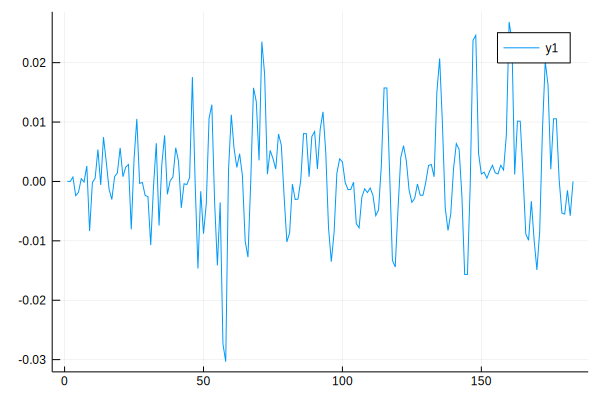

In [92]:
plot([x[4] for x in sim.u[1].u])